# Boston - House Price Prediction

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv("data/boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

## Descriptive Analysis

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation

In [5]:
df.corr(numeric_only=True).style.background_gradient(cmap="RdYlGn", vmin=-1, vmax=+1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


## Missing Values

In [6]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Outliers

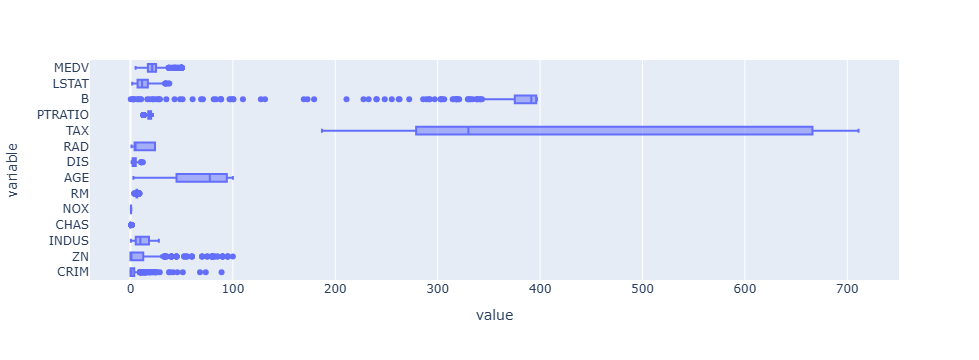

In [7]:
fig = px.box(df, x=df.columns)
fig.show()

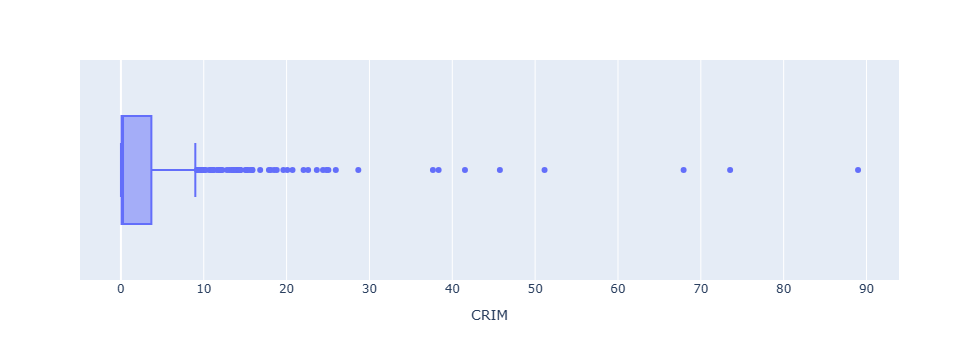

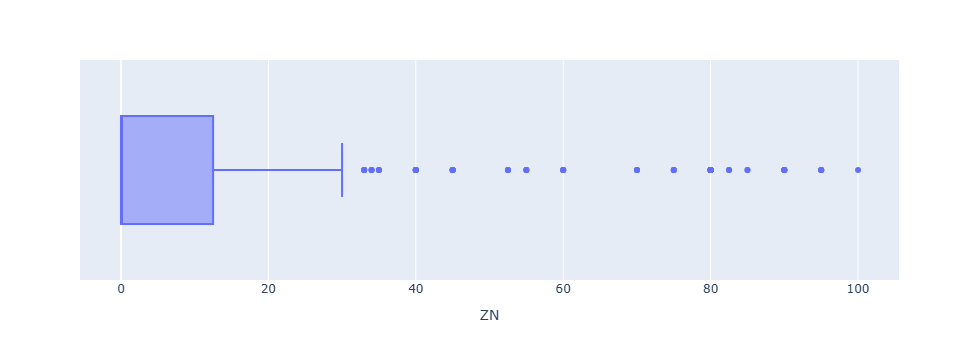

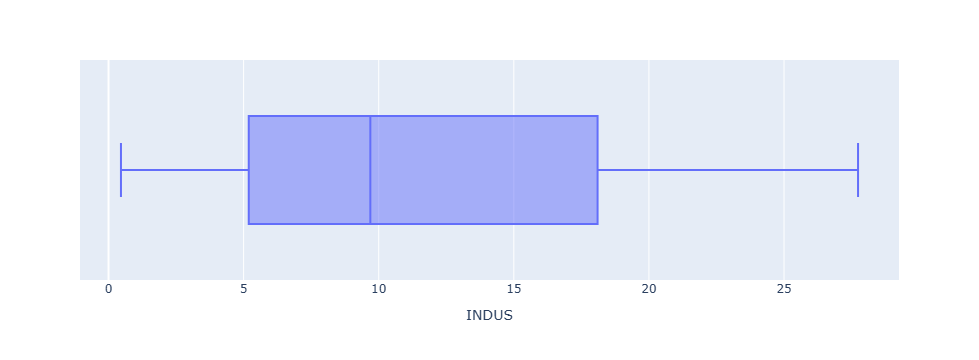

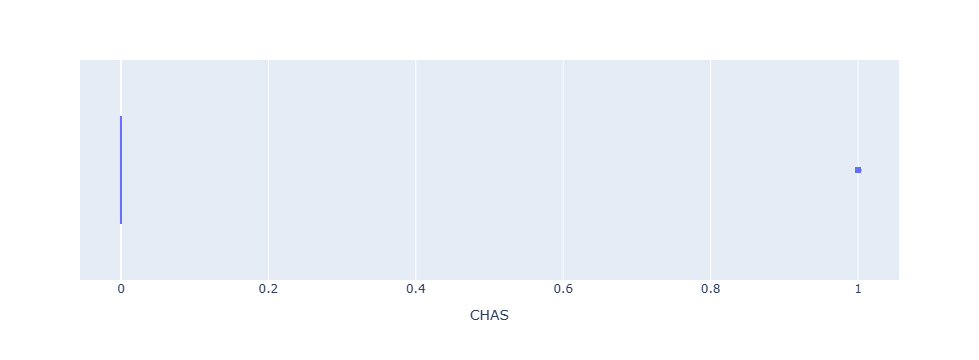

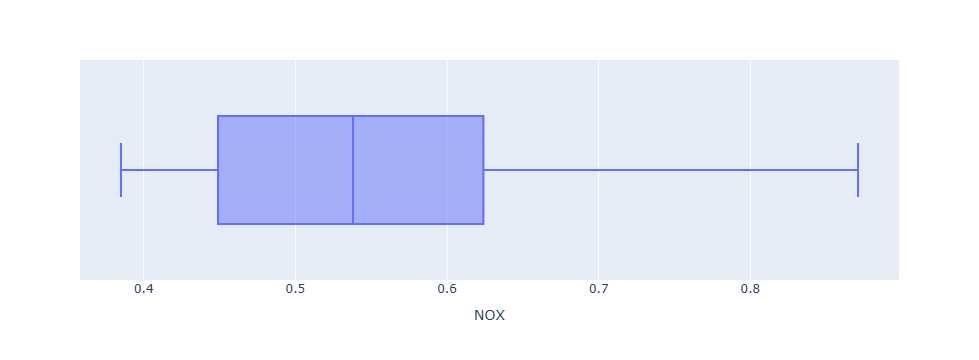

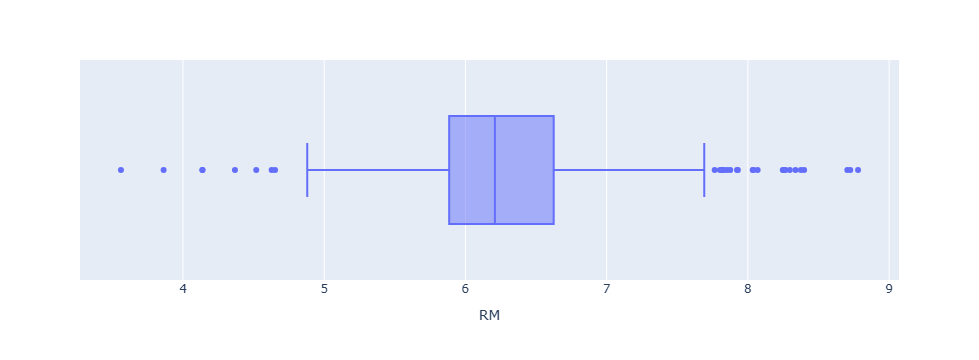

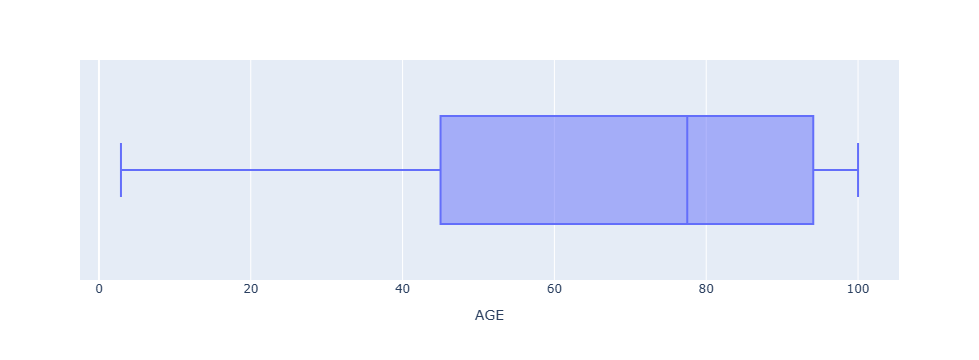

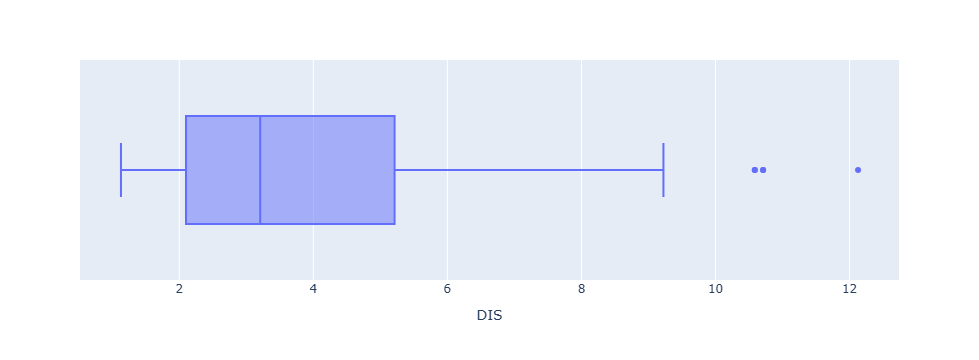

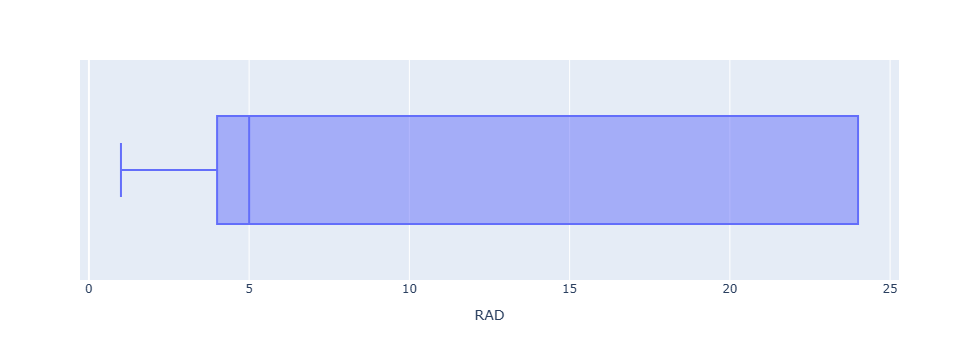

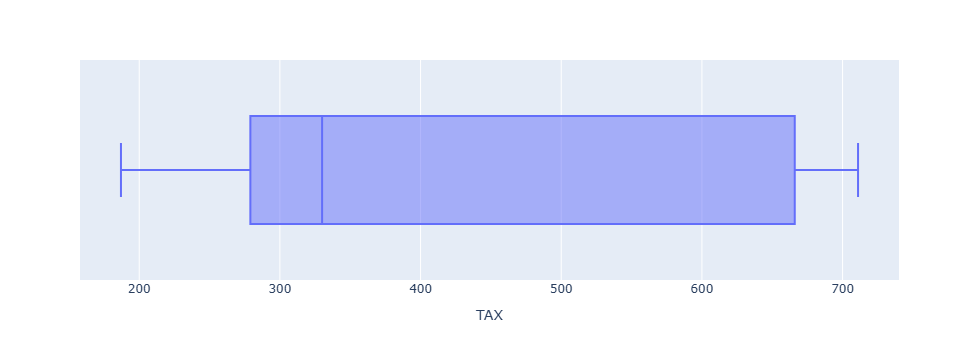

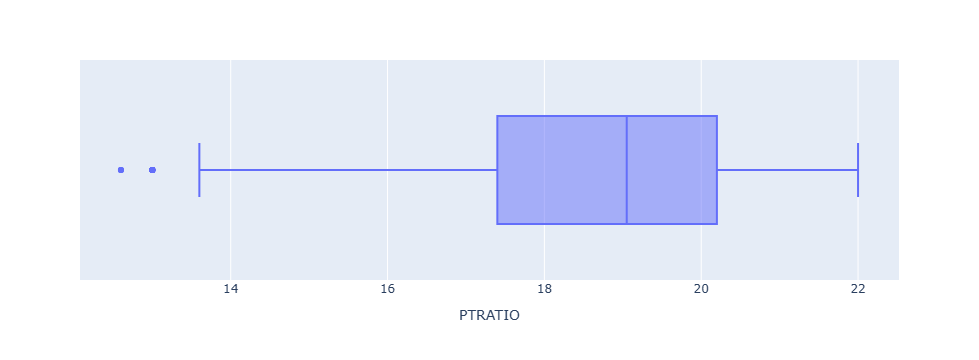

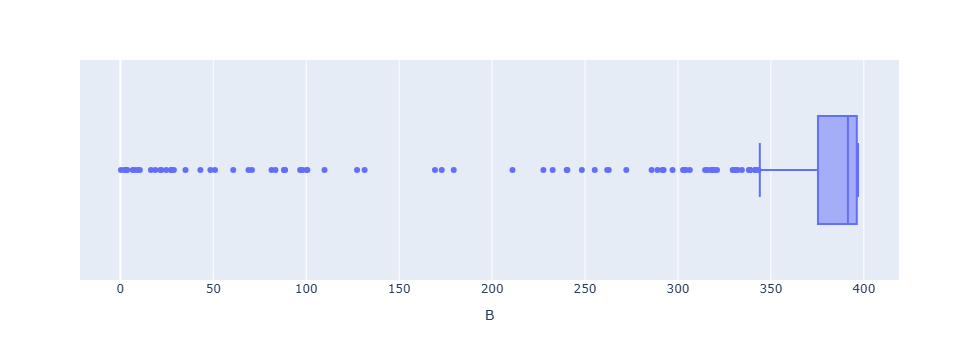

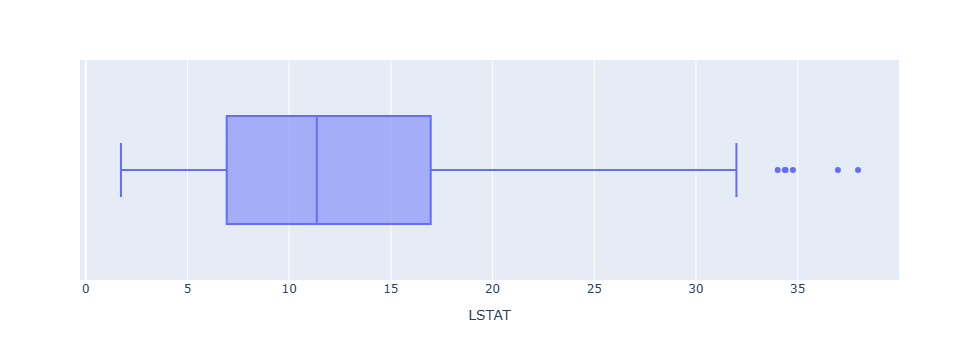

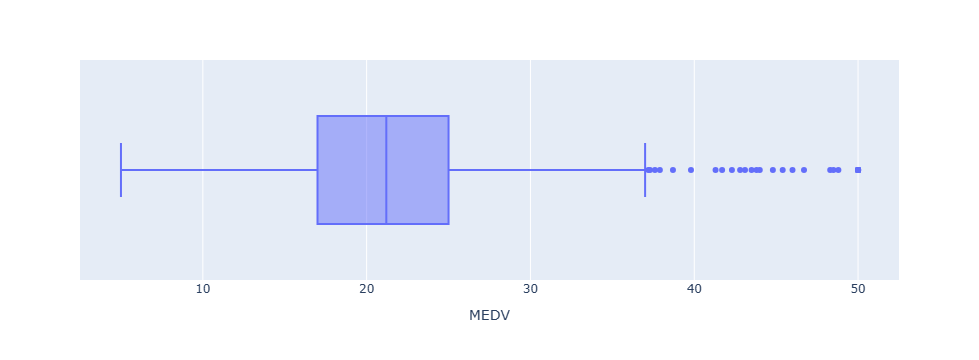

In [8]:
for col in df.columns:
    fig = px.box(df, x=col)
    fig.show()

## Distribution of Label

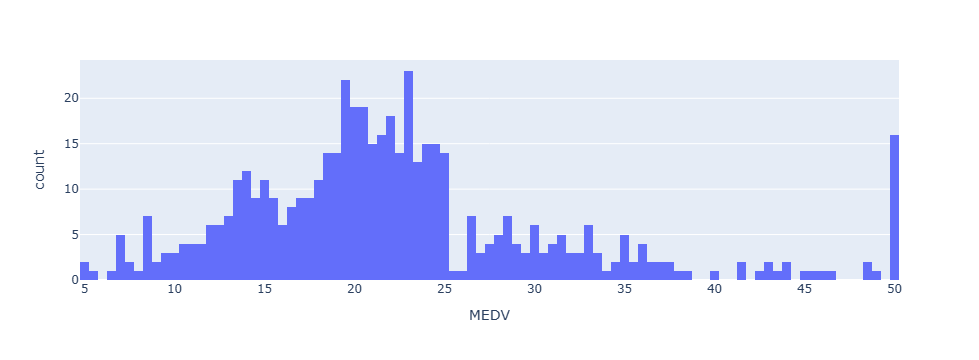

In [9]:
fig = px.histogram(df, x='MEDV', nbins=100)
fig.show()

In [10]:
df["MEDV"].skew()

1.1080984082549072

## Feature Selection

In [11]:
features = df.drop(columns=["MEDV"]).columns

## Scaling

In [12]:
df_robust = df.copy()

scaler = RobustScaler()
df_robust[features] = scaler.fit_transform(df_robust[features])
df_robust.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681,24.0
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889,21.6
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634,34.7
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579,33.4
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699,36.2


In [13]:
df_std = df.copy()

scaler = StandardScaler()
df_std[features] = scaler.fit_transform(df_std[features])
df_std.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


In [14]:
df_minmax = df.copy()

scaler = MinMaxScaler()
df_minmax[features] = scaler.fit_transform(df_minmax[features])
df_minmax.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [15]:
fig = px.box(df_minmax, x=features)
fig.show()

In [16]:
fig = px.box(df_robust, x=features)
fig.show()

In [17]:
fig = px.box(df_std, x=features)
fig.show()

## Feature Selection

In [18]:
df = df_robust.copy()

X = df[features]
y = df["MEDV"]

## Train/Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Training

In [20]:
model = MLPRegressor(random_state=42,
                     hidden_layer_sizes=(10, 10, 5, ),
                     max_iter=1000,
                     n_iter_no_change=50,
                     early_stopping=True,
                     verbose=True)
model.fit(X_train, y_train)

Iteration 1, loss = 314.13584482
Validation score: -7.776061
Iteration 2, loss = 313.60508452
Validation score: -7.761487
Iteration 3, loss = 313.06890784
Validation score: -7.746593
Iteration 4, loss = 312.50284189
Validation score: -7.731465
Iteration 5, loss = 311.92592262
Validation score: -7.715814
Iteration 6, loss = 311.34081053
Validation score: -7.699821
Iteration 7, loss = 310.77094234
Validation score: -7.683447
Iteration 8, loss = 310.18264937
Validation score: -7.666589
Iteration 9, loss = 309.57971849
Validation score: -7.649505
Iteration 10, loss = 308.94720207
Validation score: -7.631761
Iteration 11, loss = 308.29460585
Validation score: -7.613338
Iteration 12, loss = 307.64612930
Validation score: -7.594657
Iteration 13, loss = 306.98429497
Validation score: -7.575231
Iteration 14, loss = 306.29106374
Validation score: -7.555355
Iteration 15, loss = 305.58601671
Validation score: -7.535076
Iteration 16, loss = 304.85704986
Validation score: -7.514397
Iteration 17, los

MLPRegressor(early_stopping=True, hidden_layer_sizes=(10, 10, 5), max_iter=1000,
             n_iter_no_change=50, random_state=42, verbose=True)

### Los/Validation Curve

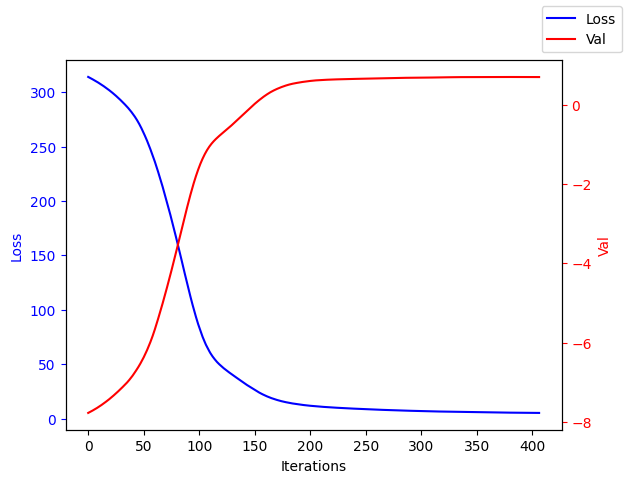

In [21]:
fig, ax1 = plt.subplots()

# Plot the first data set
ax1.plot(list(range(model.n_iter_)), model.loss_curve_, 'b-', label='Loss')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Loss', color='b')
ax1.tick_params('y', colors='b')

# Create the second axis
ax2 = ax1.twinx()

# Plot the second data set
ax2.plot(list(range(model.n_iter_)), model.validation_scores_, 'r-', label='Val')
ax2.set_ylabel('Val', color='r')
ax2.tick_params('y', colors='r')

# Add legend
fig.legend()

# Show the plot
plt.show()

### Evaluation Metrics

In [22]:
model.score(X_train, y_train)

0.8600514488870399

In [23]:
model.score(X_test, y_test)

0.7974887002117252

In [24]:
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = root_mean_squared_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

mae, mse, rmse, mape

(2.3996768089900353,
 14.850919746188495,
 3.8536891086578966,
 0.1206048056449682)